In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Age Distribution')

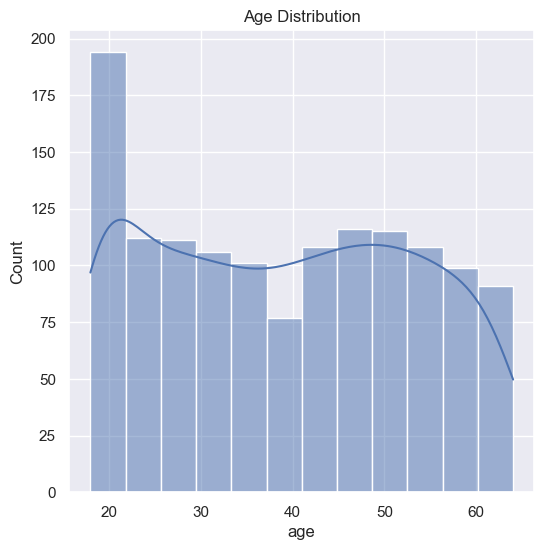

In [7]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(df['age'],kde=True)
plt.title('Age Distribution')

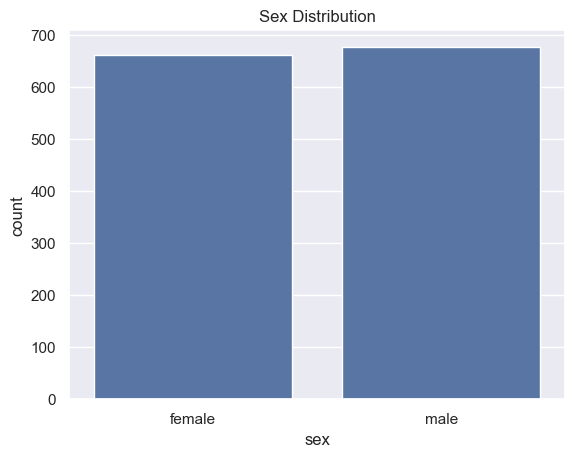

In [8]:
plt.Figure(figsize=(6,6))
sns.countplot(x = df['sex'])
plt.title('Sex Distribution')
plt.show()

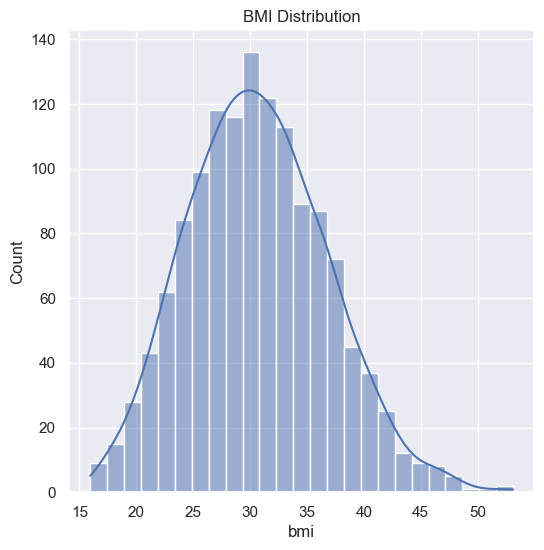

In [9]:
plt.figure(figsize=(6,6))
sns.histplot(df['bmi'],kde=True)
plt.title('BMI Distribution')
plt.show()

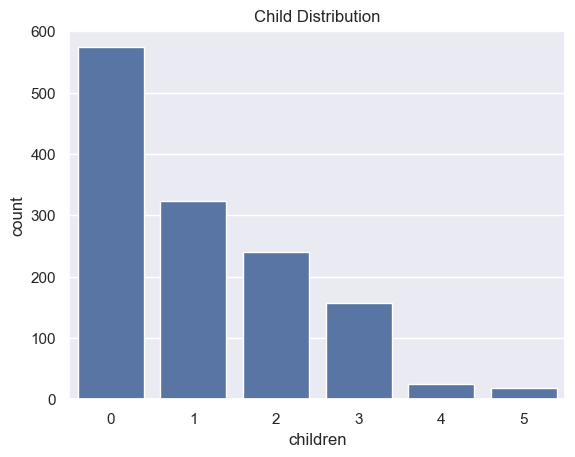

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [10]:
plt.Figure(figsize=(6,6))
sns.countplot(x = df['children'])
plt.title('Child Distribution')
plt.show()
df['children'].value_counts()

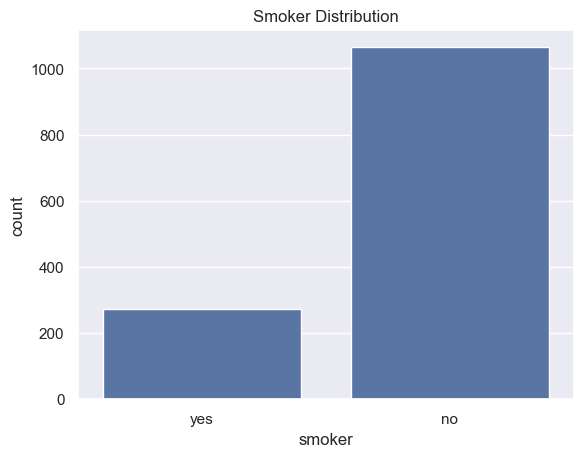

smoker
no     1064
yes     274
Name: count, dtype: int64

In [11]:
plt.Figure(figsize=(6,6))
sns.countplot(x = df['smoker'])
plt.title('Smoker Distribution')
plt.show()
df['smoker'].value_counts()

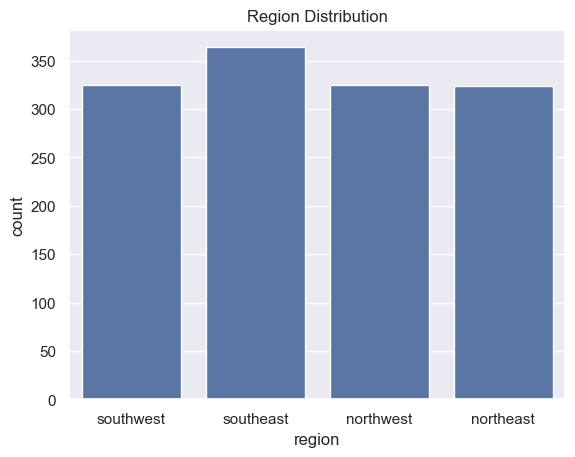

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [12]:
plt.Figure(figsize=(6,6))
sns.countplot(x = df['region'])
plt.title('Region Distribution')
plt.show()
df['region'].value_counts()

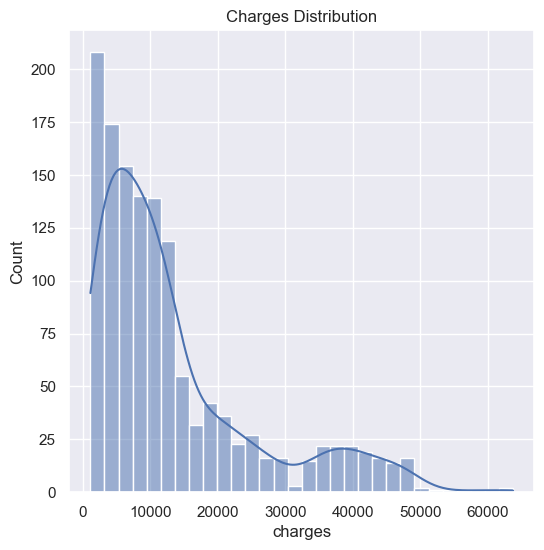

In [13]:
plt.figure(figsize=(6,6))
sns.histplot(df['charges'],kde=True)
plt.title('Charges Distribution')
plt.show()

In [14]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':1,'no':0}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

C:\Users\Mahboob Alam\AppData\Local\Temp\ipykernel_19688\2660952240.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1}},inplace=True)
C:\Users\Mahboob Alam\AppData\Local\Temp\ipykernel_19688\2660952240.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':1,'no':0}},inplace=True)
C:\Users\Mahboob Alam\AppData\Local\Temp\ipykernel_19688\2660952240.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain 

In [15]:
x = df.drop(columns='charges',axis=1)
y = df['charges']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
import pickle

# Assuming x_train and y_train are your training data
lr = LinearRegression()
lr.fit(x_train, y_train)

# Save the trained model
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(lr, file)

# Load the trained model
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use 'loaded_model' for predictions
predictions = loaded_model.predict(x_test)

In [19]:
r2_score_ = metrics.r2_score(y_test, predictions)
r2_score_

0.783021587162344